# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [19]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv('./dados/heart_disease_uci.csv').drop(['id', 'dataset'], axis='columns')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [20]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [21]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab['prob_doente'] = tab[1]/tab['All']
tab['chance_doente'] = tab[1]/tab[0]
tab['razao_chance'] = tab['chance_doente']/tab['chance_doente']['All']
tab['logito'] = np.log(tab['chance_doente'])
tab['woe'] = np.log(tab['razao_chance'])
tab

flag_doente,0,1,All,prob_doente,chance_doente,razao_chance,logito,woe
sex,,,,,,,,
Female,144,50,194,0.257732,0.347222,0.280370,-1.057790,-1.271645
Male,267,459,726,0.632231,1.719101,1.388115,0.541802,0.327947
All,411,509,920,0.553261,1.238443,1.000000,0.213855,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [22]:
df['age_group'] =  pd.qcut(df['age'], 5)
tab = pd.crosstab(df['age_group'], df['flag_doente'], margins=True)
tab['prob_doente'] = tab[1]/tab['All']
tab['chance_doente'] = tab[1]/tab[0]
tab['razao_chance'] = tab['chance_doente']/tab['chance_doente']['All']
tab['logito'] = np.log(tab['chance_doente'])
tab['woe'] = np.log(tab['razao_chance'])
tab['media_idade'] = df.groupby('age_group')['age'].mean()
tab.loc['All','media_idade'] = df['age'].mean()
tab

flag_doente,0,1,All,prob_doente,chance_doente,razao_chance,logito,woe,media_idade
age_group,,,,,,,,,
"(27.999, 45.0]",135,61,196,0.311224,0.451852,0.364855,-0.794401,-1.008256,39.846939
"(45.0, 52.0]",94,98,192,0.510417,1.042553,0.841826,0.041673,-0.172182,49.322917
"(52.0, 57.0]",88,113,201,0.562189,1.284091,1.036859,0.250051,0.036196,54.985075
"(57.0, 62.0]",49,127,176,0.721591,2.591837,2.092819,0.952367,0.738512,59.886364
"(62.0, 77.0]",45,110,155,0.709677,2.444444,1.973805,0.893818,0.679963,66.825806
All,411,509,920,0.553261,1.238443,1.000000,0.213855,0.000000,53.510870


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

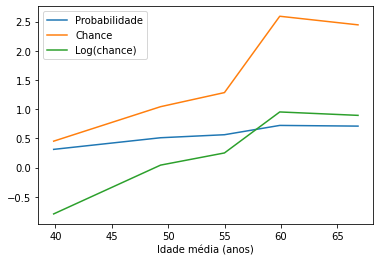

In [34]:
fig, ax = plt.subplots()
ax.set_xlabel('Idade média (anos)')
ax.plot(tab['media_idade'][:-1], tab['prob_doente'][:-1], label='Probabilidade')
ax.plot(tab['media_idade'][:-1], tab['chance_doente'][:-1], label='Chance')
ax.plot(tab['media_idade'][:-1], tab['logito'][:-1], label='Log(chance)')
ax.legend()